<h1>CROSS VALIDATION</H1>

<h2>se configura el mejor modelo del caso 1 el cual es el modelo de regresion ponderada  </h2>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [50]:
#Importar base de datos
df = pd.read_csv('nike_shoes_sales.csv')

In [51]:
total_faltantes_por_columna = df.isnull().sum()
total_faltantes_por_columna

product_name      0
product_id        0
listing_price     0
sale_price        0
discount          0
brand             0
description       3
rating            0
reviews           0
images           71
dtype: int64

In [52]:
df.drop(['discount', 'images'], axis=1, inplace=True)

In [53]:
df['description'].fillna('', inplace=True)

In [54]:
#categorizacion del rating

def categorize_rating(rating):
    if rating < 2:
        return 1
    elif rating < 4:
        return 2
    else:
        return 3

df['category'] = df['rating'].apply(categorize_rating)

print(df)

                             product_name  product_id  listing_price  \
0          Nike Air Force 1 '07 Essential  CJ1646-600              0   
1                    Nike Air Force 1 '07  CT4328-101              0   
2            Nike Air Force 1 Sage Low LX  CI3482-200              0   
3                     Nike Air Max Dia SE  CD0479-200              0   
4                     Nike Air Max Verona  CZ6156-101              0   
..                                    ...         ...            ...   
638                    Air Jordan 8 Retro  CI1236-100          15995   
639            Nike Phantom Venom Club IC  AO0578-717           4995   
640  Nike Mercurial Superfly 7 Academy TF  AT7978-414           8495   
641                       Nike Air Max 98  AH6799-300              0   
642                        Nike P-6000 SE  CJ9585-600           8995   

     sale_price brand                                        description  \
0          7495  Nike  Let your shoe game shimmer in the Ni

In [55]:
#eliminar atipicos de reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# cuartiles
Q1 = df['reviews'].quantile(0.25)
Q3 = df['reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_atip_reviews = df[(df['reviews'] > lower_bound) & (df['reviews'] < upper_bound)]

In [56]:
valores_unicos = df_atip_reviews['reviews'].unique()

In [57]:
#imputación de los datos por medio de la media

df_media = df_atip_reviews.copy()
df_media['listing_price'].replace(0, pd.NA, inplace=True)

# Calcular la media de la columna "listing_price" excluyendo los valores NaN
media_listing_price = df_atip_reviews['listing_price'].mean()

# Imputar los valores faltantes en la columna "listing_price" con la media calculada
df_media['listing_price'].fillna(media_listing_price, inplace=True)

In [58]:

# Eliminar las filas donde el valor de "listing_price" es igual a 0
df_nuevo = df_atip_reviews.copy()
df_nuevo = df_atip_reviews[df_atip_reviews['listing_price'] != 0]

In [59]:
df_nuevo['resta'] = df_nuevo['sale_price'] - df_nuevo['listing_price']

/var/folders/yw/nb4gq0ps4dz27qdw36vgkbp80000gn/T/ipykernel_22594/478957022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['resta'] = df_nuevo['sale_price'] - df_nuevo['listing_price']


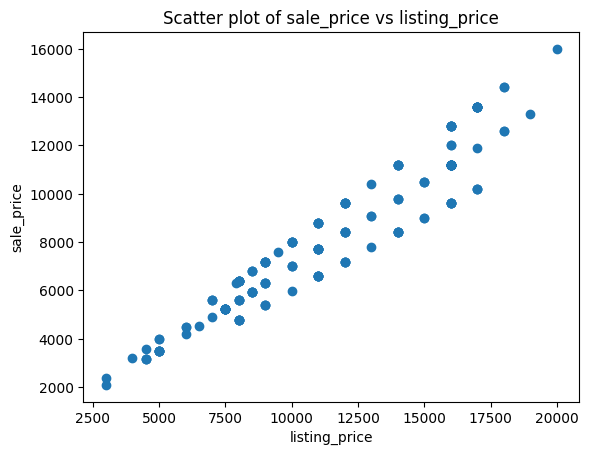

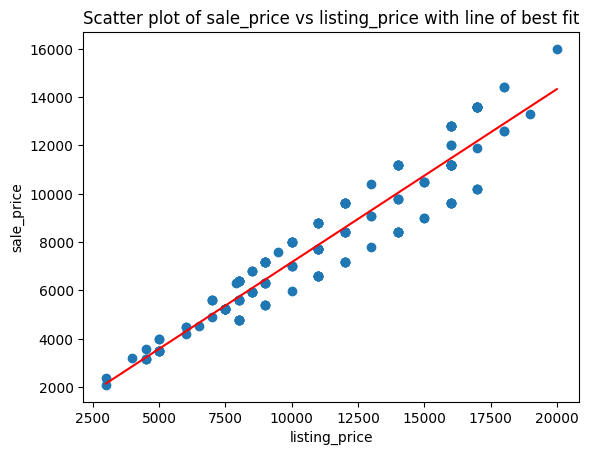

In [132]:

# Calculate the quartiles and the IQR
Q1 = df_nuevo['sale_price'].quantile(0.25)
Q3 = df_nuevo['sale_price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

# Identify and remove outliers
df_no_outliers = df_nuevo[(df_nuevo['sale_price'] > lower_bound) & (df_nuevo['sale_price'] < upper_bound)]

# Create a scatter plot
plt.scatter(df_no_outliers['listing_price'], df_no_outliers['sale_price'])
plt.xlabel('listing_price')
plt.ylabel('sale_price')
plt.title('Scatter plot of sale_price vs listing_price')
plt.show()

# Perform the linear regression
slope, intercept = np.polyfit(df_no_outliers['listing_price'], df_no_outliers['sale_price'], 1)

# Create a line of best fit
x_values = np.linspace(df_no_outliers['listing_price'].min(), df_no_outliers['listing_price'].max(), 100)
y_values = slope * x_values + intercept

# Plot the line of best fit
plt.scatter(df_no_outliers['listing_price'], df_no_outliers['sale_price'])
plt.plot(x_values, y_values, color='red')
plt.xlabel('listing_price')
plt.ylabel('sale_price')
plt.title('Scatter plot of sale_price vs listing_price with line of best fit')
plt.show()

In [122]:
# Definir las variables independientes y la variable dependiente
X = df_no_outliers[['listing_price']]
y = df_no_outliers['sale_price']

# Añadir una constante al conjunto de datos para ajustar el intercepto
X = sm.add_constant(X)

# Crear un modelo de regresión ponderada
modelo = sm.WLS(y, X, weights=1/df_no_outliers['sale_price']**2)

# Ajustar el modelo a los datos
resultados = modelo.fit()

# Imprimir el resumen del modelo
print(resultados.summary())

                            WLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.937
Model:                            WLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     2694.
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.25e-110
Time:                        19:44:48   Log-Likelihood:                -1480.5
No. Observations:                 183   AIC:                             2965.
Df Residuals:                     181   BIC:                             2971.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           205.7015    117.631      1.749

<h2>inicía la aplicación de Cross Validation con el modelo  de regresion ponderada</h2>

/var/folders/yw/nb4gq0ps4dz27qdw36vgkbp80000gn/T/ipykernel_22594/1197954432.py:42: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


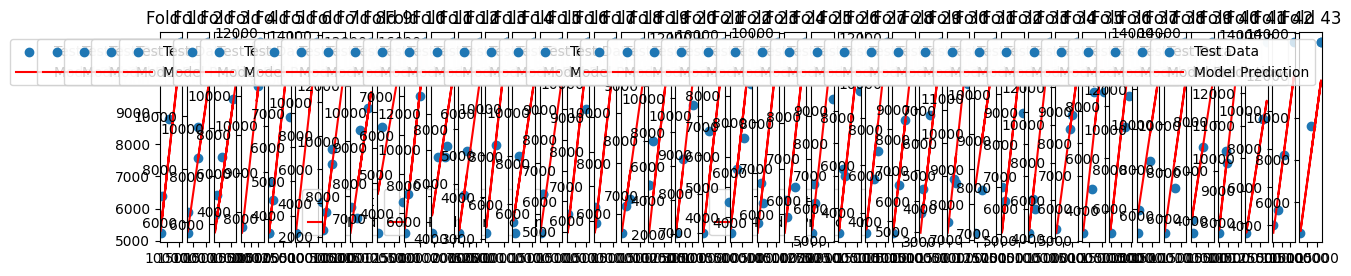

MSE promedio para K-Fold CV: 881068.63035509
[360672.6628966799, 1002219.5508775273, 1194377.2308546004, 1031573.647542439, 755700.3341783674, 640441.2200403626, 815485.5429656783, 1473275.2000021848, 1570312.8791326846, 11126.292588633685, 2371487.7345536416, 725499.8751204449, 5514.262061695575, 1147066.9105801515, 1058183.87941095, 622709.7552145458, 143398.720107729, 1017592.3364788988, 625159.0810167608, 718122.238156181, 919029.4327140255, 794571.9528582782, 321610.38231252605, 441247.9709524866, 602062.2673016877, 768681.6517251576, 549771.2296336357, 657108.820529862, 551567.8838057456, 632921.7949154864, 1019369.3120104703, 819989.9809987397, 269185.1199578805, 954250.4775894968, 1264765.54487854, 1406849.9635662157, 1565848.635776211, 1893438.8925069661, 1041818.9089218782, 166540.54331158075, 834579.5615611711, 1037695.6387886417, 2083125.7848720294]


In [130]:

# Método 1: K-Fold Cross-Validation

k =43# Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []

# Crear una figura para K-Fold
plt.figure(figsize=(15, 6))

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Ajustar el modelo de regresion ponderada en el conjunto de entrenamiento simulado
    modelo_fold = sm.WLS(y_train, X_train, weights=1/y_train**2)
    #Aquí se está ajustando un modelo ponderado utilizando los datos de entrenamiento 
    # X_train e y_train del pliegue actual. Los pesos se definen como el inverso del cuadrado de los valores de y_train
    resultados_fold = modelo_fold.fit()

    # Evaluar el modelo en el conjunto de prueba
    y_pred = resultados_fold.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    # Visualizar el ajuste del modelo para cada pliegue
    plt.subplot(2, k, fold)
    plt.scatter(X_test['listing_price'], y_test, label='Test Data')
    plt.plot(X_test['listing_price'], y_pred, label='Model Prediction', color='red')
    plt.title(f'Fold {fold}')
    plt.legend()
    fold += 1

# Calcular el MSE promedio para los pliegues
mean_mse = np.mean(mse_scores)

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Mostrar los resultados de la validación cruzada
plt.show()

# Mostrar el MSE promedio para los pliegues
print(f"MSE promedio para K-Fold CV: {mean_mse}")
print(mse_scores)
